In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
%cd drive
%cd 'My Drive'
%cd 'IS projects'
%cd Homework4
%cd Q4

[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/IS projects/Homework4/Q4
[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive/IS projects/Homework4/Q4
[Errno 2] No such file or directory: 'IS projects'
/content/drive/My Drive/IS projects/Homework4/Q4
[Errno 2] No such file or directory: 'Homework4'
/content/drive/My Drive/IS projects/Homework4/Q4
[Errno 2] No such file or directory: 'Q4'
/content/drive/My Drive/IS projects/Homework4/Q4


In [115]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from tabulate import tabulate
import itertools

ALPHA = 0.1

#### Reading the data 

In [89]:
def read_data(filename): return pd.read_csv(filename, index_col = None, header = None).to_numpy()

#### Calculating gaussian probability

In [91]:
def gaussian_probability(x, mean, cov): return np.exp(-(x-mean)@(np.linalg.inv(cov))@((x-mean).T)/2)/np.sqrt(np.linalg.det(cov))

In [122]:
def predict(test_data, mean, cov, prior_probability = np.ones((10,))):
  predicted = np.zeros(test_data.shape[0])
  for j in range(test_data.shape[0]):
      likelihood = [gaussian_probability(test_data[j], mean[i], cov[i])*prior_probability[i] for i in range(len(mean))]
      predicted[j] = np.argmax(likelihood)
  return predicted

In [107]:
def calculate_accuracy(predicted_labels, test_labels): return (predicted_labels == test_labels).mean()

In [133]:
train_data = read_data('Train_Data.csv')
test_data = read_data('Test_Data.csv')
train_labels = read_data('Train_Labels.csv')
test_labels = read_data('Test_Labels.csv')


---
## Part 1.

#### Without Prior Knowledge

In [134]:
number_classes = np.unique(train_labels).shape[0]

#to prevent from overflowing
train_data *= 0.01
test_data *= 0.01

means = [np.mean(train_data[train_labels.flatten() == i], axis = 0) for i in range(number_classes)]
covariances = [np.cov(train_data[train_labels.flatten() == i].T) for i in range(number_classes)]

if not np.linalg.det(covariances).any() :
  covariances = [(1 - ALPHA) * covariances[i] + (ALPHA * np.trace(covariances[i]) * np.identity(len(covariances[i])))/number_classes for i in range(number_classes)]


In [135]:
predicted_labels = predict(test_data, means, covariances)
print('Accuracy of without Prior Knowledge is: %% %1.2f' %(100*calculate_accuracy(predicted_labels, test_labels.flatten())))

Accuracy of without Prior Knowledge is: % 78.57



---
## Part 2.

####Using Prior Knowledge

In [130]:
prior_probability = np.array([train_labels[train_labels.flatten() == i].shape[0] for i in range(number_classes)])/train_labels.shape[0]
prior_predicted_labels = predict(test_data, means, covariances, prior_probability)
print('Accuracy of with Prior Knowledge is: %% %1.2f' %(100*calculate_accuracy(prior_predicted_labels, test_labels.flatten())))

Accuracy of with Prior Knowledge is: % 78.57


In [137]:
prior_probability

array([0.0998, 0.1049, 0.1024, 0.0994, 0.0975, 0.0993, 0.0946, 0.1008,
       0.1002, 0.1011])


---
## Part 3.

#### Plotting Confusion Matrix

In [110]:
def make_confusion_matrix(test_labels, predicted_labels):
  class_labels = np.unique(test_labels)  
  return np.array([[np.sum((test_labels == class_labels[i]) & (predicted_labels == class_labels[j])) for j in range(len(class_labels))] for i in  range(len(class_labels))]) 

In [113]:
def plot_confusion_matrix(matrix, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.gist_yarg):
    plt.figure(figsize = (5,5))
    plt.imshow(matrix, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 10, fontweight = 'bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='white' if matrix[i,j]>thresh else 'grey')
    plt.ylabel('True Labels', fontsize = 10, fontweight = 'bold')
    plt.xlabel('Predicted Lables', fontsize = 10, fontweight = 'bold')
    plt.show()

#### Confusion Matrix 

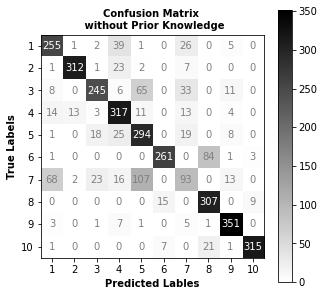

In [117]:
#withosut prior
confusion_matrix = make_confusion_matrix(test_labels.flatten(), predicted_labels)
plot_confusion_matrix(confusion_matrix, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], title = 'Confusion Matrix \n without Prior Knowledge')

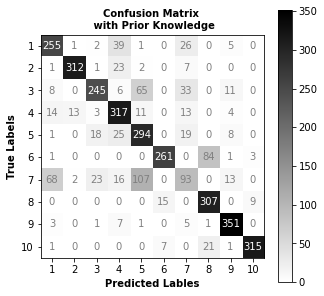

In [138]:
#with prior
confusion_matrix = make_confusion_matrix(test_labels.flatten(), prior_predicted_labels)
plot_confusion_matrix(confusion_matrix, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], title = 'Confusion Matrix \n with Prior Knowledge')